# EXTENDED FOOTBALL  (SOCCER) STATS


## Dataset Description

#### Data set info:
The data set is from Kaggle.com. The data was derived from web scraping every game data and summarizing it into the data file to be able to represent it as on the original source.

#### Number of rows :
570

#### Parameters:
Positon, Team, Number of matches played, Wins, Draws, Goals Scored, Goals Missed, Points


#### Target:
See how the actual vs expected points affect different parts of data (Xpts_Diff)
Especially in a sport such as soccer. 

First I am going to read in the data so I can describe it. 

In [287]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
fb_df = pd.read_csv ("file:///Users/Varsha/Downloads/extended-football-stats-for-european-leagues-xg.zip")

In [288]:
fb_df.describe()

,Unnamed: 1,position,matches,wins,draws,loses,scored,missed,pts,xG,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,...,570.000000,570.000000,570.000000,5.700000e+02,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,2016.000000,10.061404,36.245614,13.531579,9.182456,13.531579,48.385965,48.385965,49.777193,46.957947,...,46.957947,-1.428018,42.881170,1.495879e-16,10.735848,10.735848,209.524561,209.524561,49.939568,0.162375
std,1.415456,5.580982,2.906152,5.935200,2.927064,5.540700,17.634599,13.844167,17.051184,14.464017,...,11.625214,6.672813,10.826301,1.935850e+01,2.480779,3.284070,84.037695,52.899483,13.540545,7.218713
min,2014.000000,1.000000,30.000000,2.000000,2.000000,1.000000,13.000000,15.000000,13.000000,15.064491,...,16.838674,-29.175087,16.084399,-4.220877e+01,5.683535,4.394458,76.000000,83.000000,17.907700,-24.531500
25%,2015.000000,5.000000,34.000000,9.000000,7.000000,10.000000,36.000000,39.000000,38.000000,37.294168,...,39.361073,-6.100234,35.789070,-1.320242e+01,9.008791,8.653570,153.000000,171.000000,40.426425,-4.480550
50%,2016.000000,10.000000,38.000000,12.000000,9.000000,14.000000,45.000000,49.000000,46.500000,44.600600,...,47.336579,-1.202018,43.117482,-3.202510e+00,10.408070,10.192134,187.000000,206.000000,47.411750,0.218650
75%,2017.000000,15.000000,38.000000,17.000000,11.000000,17.000000,56.000000,57.000000,60.000000,53.788473,...,54.619647,3.200394,50.214848,9.843395e+00,12.211141,11.971695,243.000000,246.000000,57.330075,4.802800
max,2018.000000,20.000000,38.000000,32.000000,18.000000,29.000000,118.000000,94.000000,100.000000,113.598270,...,78.863255,15.540152,72.013818,7.304931e+01,20.304275,30.468113,582.000000,364.000000,94.380000,23.047500


I first want to look at what each columns data type is:

In [289]:
fb_df.dtypes

Unnamed: 0       object
Unnamed: 1        int64
position          int64
team             object
matches           int64
wins              int64
draws             int64
loses             int64
scored            int64
missed            int64
pts               int64
xG              float64
xG_diff         float64
npxG            float64
xGA             float64
xGA_diff        float64
npxGA           float64
npxGD           float64
ppda_coef       float64
oppda_coef      float64
deep              int64
deep_allowed      int64
xpts            float64
xpts_diff       float64
dtype: object

## Clean Dataset 


In [290]:
fb_df.head()

,Unnamed: 0,Unnamed: 1,position,team,matches,wins,draws,loses,scored,missed,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,Bundesliga,2014,1,Bayern Munich,34,25,4,5,80,18,...,21.938729,3.938729,20.423172,41.236085,5.761476,25.022717,388,83,73.6116,-5.3884
1,Bundesliga,2014,2,Wolfsburg,34,20,9,5,72,38,...,38.822021,0.822021,36.419255,18.897371,9.136319,10.289876,172,164,59.9509,-9.0491
2,Bundesliga,2014,3,Borussia M.Gladbach,34,19,9,6,53,26,...,36.343299,10.343299,33.312193,16.156039,12.751108,12.783803,221,198,57.0078,-8.9922
3,Bundesliga,2014,4,Bayer Leverkusen,34,17,10,7,62,37,...,34.720386,-2.279614,30.173724,18.224194,5.693289,7.347595,246,108,55.3396,-5.6604
4,Bundesliga,2014,5,Augsburg,34,15,4,15,43,43,...,46.659608,3.659608,43.628491,-5.908343,7.625900,10.402360,134,221,45.4960,-3.5040


 I want to rename all the columns so this way it avoids any confusion with the spelling or spacing later on. The first two columns are incorrectly named so I will be renaming those, as well as the misspelling of the column "Losses" which is currently input as "loses".

In [291]:
fb_df.columns = ["League_Name","Year_Started","Position","Team_Name","Matches","Wins","Draws",
                 "Losses","Scored","Missed","Points","Expected_Goals","xG_diff","npxG","Expected_GoalsAgainst",
                 "xGA_diff","npxGA","npxGD","ppda_coef","oppda_coef","Deep","Deep_Allowed",
                 "Expected_Points","Xpts_Diff"]

I want to examine the data for any nulls:

In [292]:
fb_df.isnull().sum()

League_Name              0
Year_Started             0
Position                 0
Team_Name                0
Matches                  0
Wins                     0
Draws                    0
Losses                   0
Scored                   0
Missed                   0
Points                   0
Expected_Goals           0
xG_diff                  0
npxG                     0
Expected_GoalsAgainst    0
xGA_diff                 0
npxGA                    0
npxGD                    0
ppda_coef                0
oppda_coef               0
Deep                     0
Deep_Allowed             0
Expected_Points          0
Xpts_Diff                0
dtype: int64

Since there are no nulls, I will not have to clean the data.

In [293]:
fb_df.head()

,League_Name,Year_Started,Position,Team_Name,Matches,Wins,Draws,Losses,Scored,Missed,...,Expected_GoalsAgainst,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,Deep,Deep_Allowed,Expected_Points,Xpts_Diff
0,Bundesliga,2014,1,Bayern Munich,34,25,4,5,80,18,...,21.938729,3.938729,20.423172,41.236085,5.761476,25.022717,388,83,73.6116,-5.3884
1,Bundesliga,2014,2,Wolfsburg,34,20,9,5,72,38,...,38.822021,0.822021,36.419255,18.897371,9.136319,10.289876,172,164,59.9509,-9.0491
2,Bundesliga,2014,3,Borussia M.Gladbach,34,19,9,6,53,26,...,36.343299,10.343299,33.312193,16.156039,12.751108,12.783803,221,198,57.0078,-8.9922
3,Bundesliga,2014,4,Bayer Leverkusen,34,17,10,7,62,37,...,34.720386,-2.279614,30.173724,18.224194,5.693289,7.347595,246,108,55.3396,-5.6604
4,Bundesliga,2014,5,Augsburg,34,15,4,15,43,43,...,46.659608,3.659608,43.628491,-5.908343,7.625900,10.402360,134,221,45.4960,-3.5040


Binning - The only column I would want to bin is the year column, but since this would combine different teams and include scores from various games I am not going to.

## Exploratory Data Analysis 

#### Examine numeric columns:

In [294]:
fb_df.select_dtypes(include=['float', 'int']).head()

,Year_Started,Position,Matches,Wins,Draws,Losses,Scored,Missed,Points,Expected_Goals,...,Expected_GoalsAgainst,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,Deep,Deep_Allowed,Expected_Points,Xpts_Diff
0,2014,1,34,25,4,5,80,18,79,66.205745,...,21.938729,3.938729,20.423172,41.236085,5.761476,25.022717,388,83,73.6116,-5.3884
1,2014,2,34,20,9,5,72,38,69,58.347731,...,38.822021,0.822021,36.419255,18.897371,9.136319,10.289876,172,164,59.9509,-9.0491
2,2014,3,34,19,9,6,53,26,66,51.741572,...,36.343299,10.343299,33.312193,16.156039,12.751108,12.783803,221,198,57.0078,-8.9922
3,2014,4,34,17,10,7,62,37,61,49.155699,...,34.720386,-2.279614,30.173724,18.224194,5.693289,7.347595,246,108,55.3396,-5.6604
4,2014,5,34,15,4,15,43,43,49,43.911698,...,46.659608,3.659608,43.628491,-5.908343,7.625900,10.402360,134,221,45.4960,-3.5040


#### Examine distribution

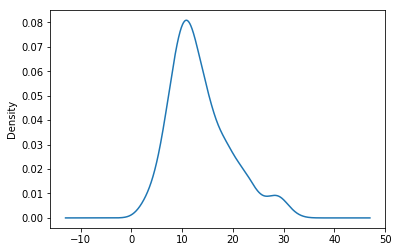

In [295]:
fb_df.Wins.plot('density')

From examining the distribution you can infer that the scaling is all different, and standardization is required. 

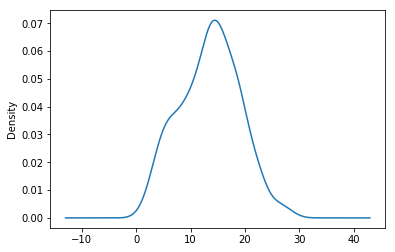

In [296]:
fb_df.Losses.plot('density')

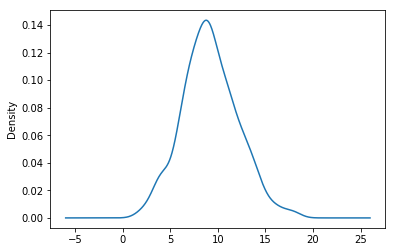

In [297]:
fb_df.Draws.plot('density')

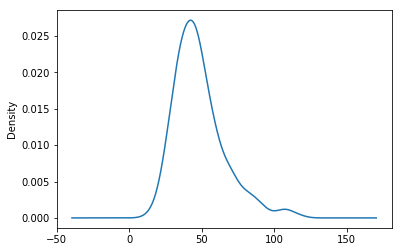

In [298]:
fb_df.Scored.plot('density')

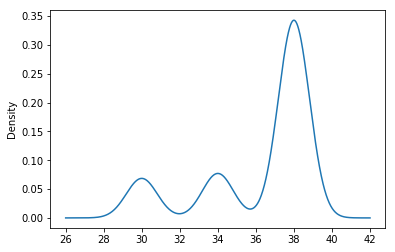

In [299]:
fb_df.Matches.plot('density')

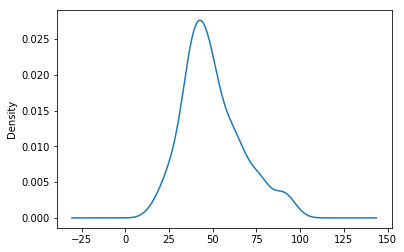

In [300]:
fb_df.Points.plot('density')

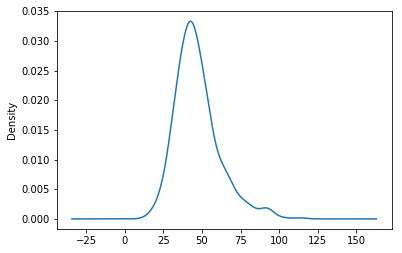

In [301]:
fb_df.Expected_Goals.plot('density')

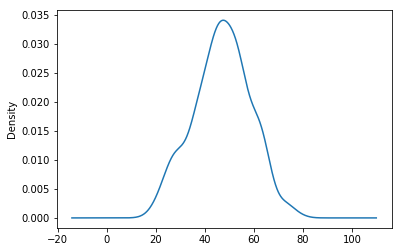

In [302]:
fb_df.Expected_GoalsAgainst.plot('density')

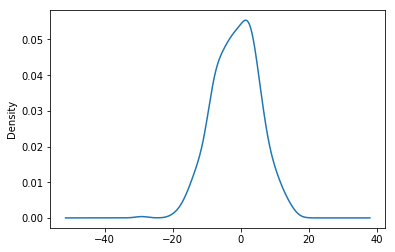

In [303]:
fb_df.xGA_diff.plot('density')

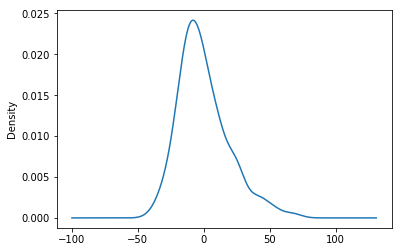

In [304]:
fb_df.npxGD.plot('density')

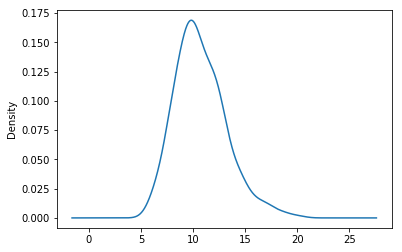

In [305]:
fb_df.ppda_coef.plot('density')

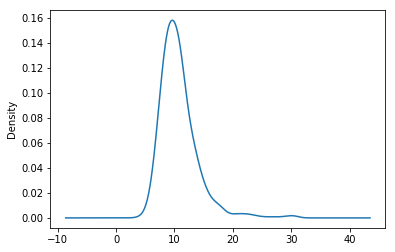

In [306]:
fb_df.oppda_coef.plot('density')

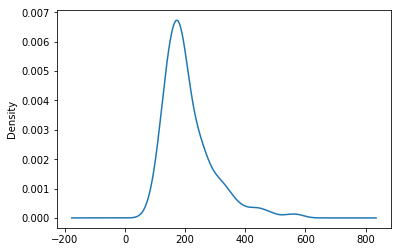

In [307]:
fb_df.Deep.plot('density')

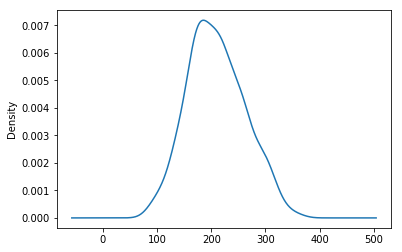

In [308]:
fb_df.Deep_Allowed.plot('density')

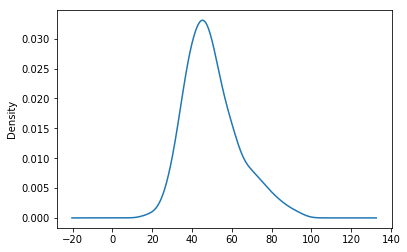

In [309]:
fb_df.Expected_Points.plot('density')

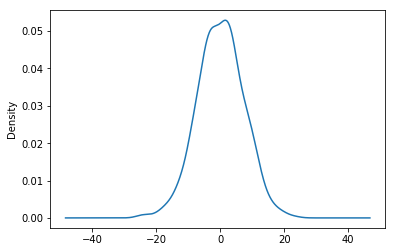

In [310]:
fb_df.Xpts_Diff.plot('density')

As you can see, most of the charts show a normal distrubiton, but I will be further using the min max scaler to standardize the data

### Normalization

Min max scaling is helpful because it scales the date between 0 and 1 so that all the numeric columns are standardized on the same scale

### Examine Correlation

In [311]:
corr = fb_df.corr()
corr

,Year_Started,Position,Matches,Wins,Draws,Losses,Scored,Missed,Points,Expected_Goals,...,Expected_GoalsAgainst,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,Deep,Deep_Allowed,Expected_Points,Xpts_Diff
Year_Started,1.000000e+00,-1.422701e-17,-1.214293e-17,0.002510,-0.010181,0.002689,0.027178,0.034619,0.000874,0.079035,...,0.098335,0.099493,0.087815,0.000000e+00,0.345037,0.260640,0.089933,0.142871,0.005502,0.008257
Position,-1.422701e-17,1.000000e+00,1.301810e-01,-0.870112,0.187476,0.901305,-0.706990,0.767288,-0.876426,-0.633812,...,0.689645,-0.390420,0.676718,-8.217152e-01,0.477974,-0.558568,-0.614252,0.621703,-0.758929,0.646624
Matches,-1.214293e-17,1.301810e-01,1.000000e+00,0.202108,0.173228,0.216498,0.294986,0.375751,0.240787,0.365567,...,0.454836,0.012829,0.451742,-2.885568e-18,0.020782,0.015699,0.166982,0.265272,0.305660,0.004586
Wins,2.510368e-03,-8.701120e-01,2.021080e-01,1.000000,-0.334472,-0.788496,0.882977,-0.615375,0.986827,0.818197,...,-0.531104,0.351449,-0.522722,8.649720e-01,-0.451938,0.642113,0.739290,-0.547382,0.891562,-0.658613
Draws,-1.018053e-02,1.874761e-01,1.732278e-01,-0.334472,1.000000,-0.079138,-0.224380,0.031134,-0.177607,-0.171363,...,0.077043,0.069629,0.080713,-1.691746e-01,0.061143,-0.233454,-0.204820,0.120261,-0.100008,0.231933
Losses,2.689107e-03,9.013048e-01,2.164982e-01,-0.788496,-0.079138,1.000000,-0.672585,0.839828,-0.836968,-0.594181,...,0.766785,-0.406527,0.754244,-8.371860e-01,0.462716,-0.556268,-0.596141,0.661962,-0.741887,0.585385
Scored,2.717773e-02,-7.069905e-01,2.949861e-01,0.882977,-0.224380,-0.672585,1.000000,-0.356012,0.883525,0.925952,...,-0.328788,0.165816,-0.322772,8.258546e-01,-0.437775,0.630792,0.797548,-0.422792,0.876481,-0.442893
Missed,3.461879e-02,7.672884e-01,3.757511e-01,-0.615375,0.031134,0.839828,-0.356012,1.000000,-0.637257,-0.306800,...,0.876966,-0.546884,0.863690,-6.993028e-01,0.376758,-0.443389,-0.391654,0.675296,-0.548488,0.476424
Points,8.738123e-04,-8.764265e-01,2.407870e-01,0.986827,-0.177607,-0.836968,0.883525,-0.637257,1.000000,0.824980,...,-0.541377,0.378951,-0.531994,8.742008e-01,-0.461438,0.630448,0.736839,-0.550956,0.913841,-0.647938
Expected_Goals,7.903514e-02,-6.338118e-01,3.655672e-01,0.818197,-0.171363,-0.594181,0.925952,-0.306800,0.824980,1.000000,...,-0.264149,0.176328,-0.250897,8.351306e-01,-0.432416,0.633282,0.835643,-0.381061,0.914043,-0.234148


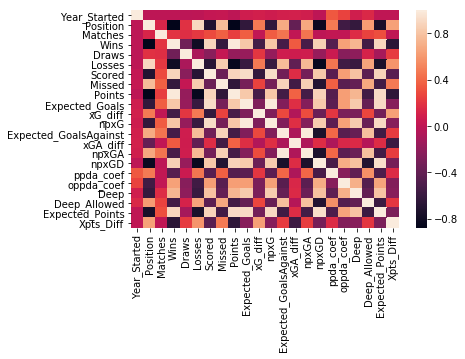

In [312]:
import seaborn as sns
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

The strongest relation for the Xpts_Diff column is the xGA_diff column. This is interesting to see I would like to further look into it.

In [313]:
testing_df = fb_df[["xGA_diff", "Xpts_Diff"]]

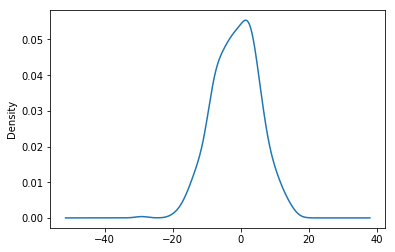

In [314]:
fb_df.xGA_diff.plot(kind='density')

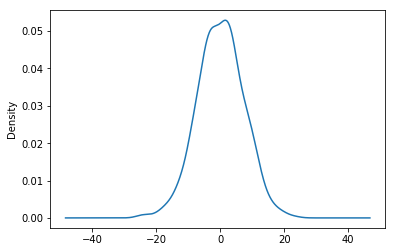

In [315]:
fb_df.Xpts_Diff.plot(kind='density')

Since the data above seems pretty normally distributed, I want to take a look at boxplots for each column too get a better view of the distribution as well as outliers. 

#### Boxplot

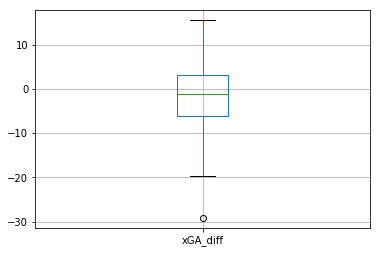

In [316]:
testing_df[["xGA_diff"]].boxplot()

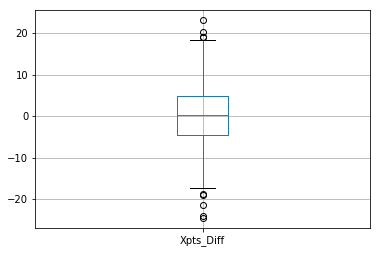

In [317]:
testing_df[["Xpts_Diff"]].boxplot()

#### Probability Plot

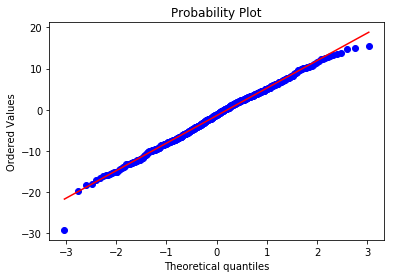

In [318]:
import scipy.stats as stats

stats.probplot(fb_df.xGA_diff, dist="norm", plot=plt)
plt.show()

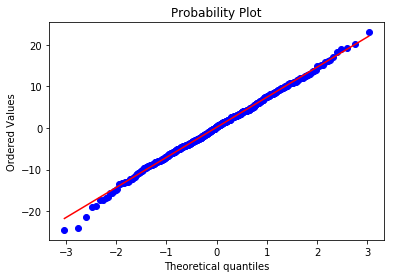

In [319]:
import scipy.stats as stats

stats.probplot(fb_df.Xpts_Diff, dist="norm", plot=plt)
plt.show()

In [347]:
# just seeing a positively correlated relationship
testing_df2 = fb_df[["Expected_Points", "Expected_Goals"]]

The probability plot further proves that the distribution is normal

#### Correlation Scatter Plot

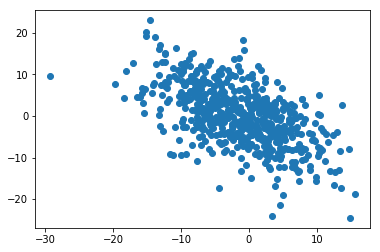

In [320]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(fb_df.xGA_diff, fb_df.Xpts_Diff)

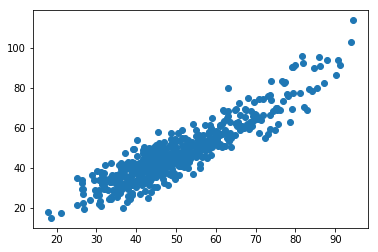

In [348]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(fb_df.Expected_Points, fb_df.Expected_Goals)

### Testsing for Normality

#### Shapiro-Wilk

In [321]:
from scipy.stats import shapiro
W_stat, p = shapiro(testing_df.xGA_diff)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.9955883622169495, Pvalue= 0.10741623491048813
Sample looks Gaussian (fail to reject H0)


In [322]:
from scipy.stats import shapiro
W_stat, p = shapiro(testing_df.Xpts_Diff)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.9979878067970276, Pvalue= 0.7446398138999939
Sample looks Gaussian (fail to reject H0)


#### D'agostino's K Squared

In [323]:
from scipy.stats import normaltest
k2_stat, p = normaltest(testing_df.xGA_diff)
print('K^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

K^2 Stat= 2.8507720189335464, Pvalue= 0.2404156425806776
Sample looks Gaussian (fail to reject H0)


In [324]:
from scipy.stats import normaltest
k2_stat, p = normaltest(testing_df.Xpts_Diff)
print('K^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

K^2 Stat= 2.1609191255079514, Pvalue= 0.33943949604537826
Sample looks Gaussian (fail to reject H0)


#### Anderson-Darling

In [325]:
from scipy.stats import anderson

result = anderson(testing_df.xGA_diff)

print('Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))

Test Statistic: 0.493249830780087
Significance: 15.0 
 Pval cutoff: 0.572 - Data looks normal (fail to reject H0)
Significance: 10.0 
 Pval cutoff: 0.651 - Data looks normal (fail to reject H0)
Significance: 5.0 
 Pval cutoff: 0.782 - Data looks normal (fail to reject H0)
Significance: 2.5 
 Pval cutoff: 0.912 - Data looks normal (fail to reject H0)
Significance: 1.0 
 Pval cutoff: 1.084 - Data looks normal (fail to reject H0)


In [326]:
from scipy.stats import anderson

result = anderson(testing_df.Xpts_Diff)

print('Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))

Test Statistic: 0.21348235640027724
Significance: 15.0 
 Pval cutoff: 0.572 - Data looks normal (fail to reject H0)
Significance: 10.0 
 Pval cutoff: 0.651 - Data looks normal (fail to reject H0)
Significance: 5.0 
 Pval cutoff: 0.782 - Data looks normal (fail to reject H0)
Significance: 2.5 
 Pval cutoff: 0.912 - Data looks normal (fail to reject H0)
Significance: 1.0 
 Pval cutoff: 1.084 - Data looks normal (fail to reject H0)


#### Outliers

Since both the columns are normally distributed, and the box plots have a few outliers I am going to leave them in since it does not affect data.
But I will still check to see the outliers below:

In [327]:
from scipy.stats import zscore
fb_df["xGA_diff_Z"] = zscore(fb_df.xGA_diff)

In [328]:
len(fb_df[abs(fb_df.xGA_diff_Z) > 2.5])

5

In [329]:
from scipy.stats import zscore
fb_df["Xpts_Diff_Z"] = zscore(fb_df.Xpts_Diff)

In [330]:
len(fb_df[abs(fb_df.Xpts_Diff_Z) > 2.5])

10

## Linear Regression 

In [331]:
r_sq = fb_df[["xGA_diff", "Xpts_Diff"]].corr() 
r_sq

,xGA_diff,Xpts_Diff
xGA_diff,1.000000,-0.576678
Xpts_Diff,-0.576678,1.000000


In [332]:
B1 = -0.576678 * (np.std(fb_df.xGA_diff)/np.std(fb_df.Xpts_Diff))

In [333]:
print("For 1 unit of change in X, we can predict {} units of change in Y".format(B1))

For 1 unit of change in X, we can predict -0.5330679061941141 units of change in Y


In [334]:
B0 = fb_df.xGA_diff.mean() - (B1 * fb_df.Xpts_Diff.mean())
B0

-1.3414612248197755

In [337]:
fb_df["y_line"] = B0 + (B1 * fb_df.Xpts_Diff)

In [338]:
fb_df.head()

,League_Name,Year_Started,Position,Team_Name,Matches,Wins,Draws,Losses,Scored,Missed,...,npxGD,ppda_coef,oppda_coef,Deep,Deep_Allowed,Expected_Points,Xpts_Diff,xGA_diff_Z,Xpts_Diff_Z,y_line
0,Bundesliga,2014,1,Bayern Munich,34,25,4,5,80,18,...,41.236085,5.761476,25.022717,388,83,73.6116,-5.3884,0.804977,-0.769618,1.530922
1,Bundesliga,2014,2,Wolfsburg,34,20,9,5,72,38,...,18.897371,9.136319,10.289876,172,164,59.9509,-9.0491,0.337491,-1.277176,3.482324
2,Bundesliga,2014,3,Borussia M.Gladbach,34,19,9,6,53,26,...,16.156039,12.751108,12.783803,221,198,57.0078,-8.9922,1.765621,-1.269287,3.451992
3,Bundesliga,2014,4,Bayer Leverkusen,34,17,10,7,62,37,...,18.224194,5.693289,7.347595,246,108,55.3396,-5.6604,-0.127734,-0.807331,1.675916
4,Bundesliga,2014,5,Augsburg,34,15,4,15,43,43,...,-5.908343,7.625900,10.402360,134,221,45.4960,-3.5040,0.763111,-0.508345,0.526409


Text(0.5, 0, 'Independent Variable')

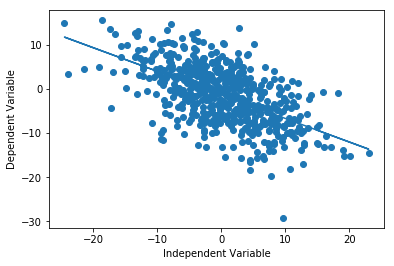

In [339]:
plt.scatter(fb_df.Xpts_Diff,fb_df.xGA_diff) 
plt.plot(fb_df.Xpts_Diff, fb_df.y_line)
plt.ylabel("Dependent Variable")
plt.xlabel("Independent Variable")

## Conclusion 

Going into this I focused on the column "Xpts_Diff" because it contained all the data points for the difference between actual scored points and the expected scored points. Predicted scores in sports are made all the time and the stats are based on the previous scores or how the league generally performs. So in this conclusion I hope to convey all the observations I drew regarding this.

#### First I would like to talk about the density charts for all the numerical values:

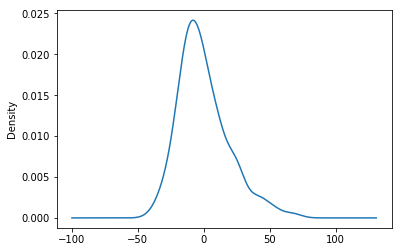

In [341]:
fb_df.npxGD.plot('density')

Even though all the values had a bell curve, they did not all peak at "0". I think the reason for the bell curve being skewed is because most teams have a certain range of wins, and losses in order to end up in the "poisition" or rank they did. Some columns did center around the zero value such as the npxGD plot above. The bell curves that showed the same resemblence were examining differences between pre-season predicted values vs what actually scored. This point is interesting to note because the same happens for all sports

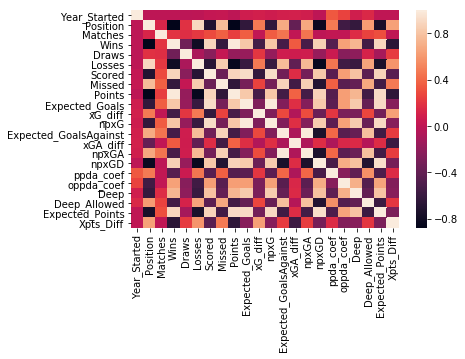

In [343]:
import seaborn as sns
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#### Correlation Map 
As I was looking at the correlation map and comparing the relation between different columns to Xpts_Diff, I was intrigued by several relations. The first being xGA_diff, and the second being the wins column.
The relation between Wins and Xpts_Diff has a high negative correlation. 
The relationship between xGA_diff (difference between missed goals and difference between expected goals) and Xpts_Diff also has a negative correlation (-0.576678). 

So what causes the inverse relationship between xGA_diff and Xpts_Diff?
If a team misses more points (the difference of actual missed vs expected missed = xGA_diff), then it would score less decreasing Xpts_Diff(difference between actual points vs expected points).
This like any other inverse relationship menas that when xGA_diff increases, Xpts_Diff decreases, and vice versa.

#### This inverse relationship can be explained by this correlation plot:

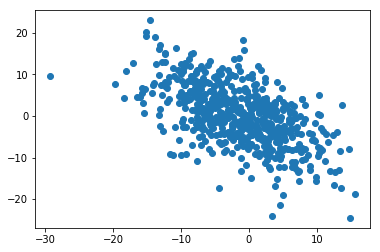

In [344]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(fb_df.xGA_diff, fb_df.Xpts_Diff)

Since most of the points are clustered around a hypothetical line, while others spread around it, we can conclude that this relationship is infact moderaltey negative

#### Examining Normality with Tests:

The first test I used was the Shapiro-Wilk test. The data sets xGA_diff and Xpts_Diff had p-values of 0.10741623491048813 and 0.7446398138999939. Since both these p-values were greater than 0.05 we have concluded that the data is normally distributed.

The D'agostino's K Squared examines distribution for skewness to determine if it departs from normal distribution. Even though the p-values were < 0.05, both of the data is highly positively skewed:
xGA_diff K^2 Stat= 2.8507720189335464
Xpts_Diff K^2 Stat= 2.1609191255079514
This indicates that the data is high Kurtosis, meaning it has heavy tails. 
So this brings the question -- How do football stastics compare to other data sets that are normally distributed?
In datasets such as income or age etc, it is possible to have just as many low values that include zero as well as high values. In sports, depending on the sport, data generally skews either really high or really low (to the left). For example in a low scoring game like soccer, it might have  alot of data points on the left tail end vs in basketball where it might have more points towards the right tail end

#### Linear Regression

Text(0.5, 0, 'Independent Variable')

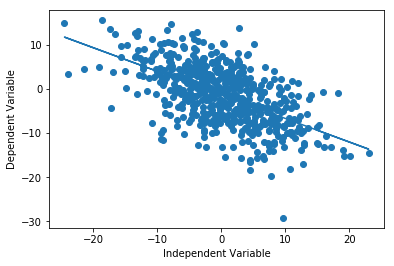

In [345]:
plt.scatter(fb_df.Xpts_Diff,fb_df.xGA_diff) 
plt.plot(fb_df.Xpts_Diff, fb_df.y_line)
plt.ylabel("Dependent Variable")
plt.xlabel("Independent Variable")

The linear regression line proves the theory above of an inverse relationship

#### Plotting a positvely related table to draw conclusions:

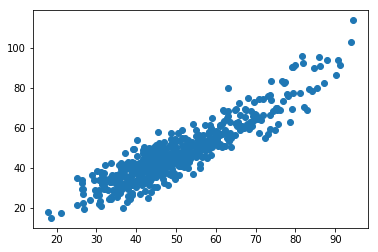

In [349]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(fb_df.Expected_Points, fb_df.Expected_Goals)

I chose these two particular columns just to answer my question : as expected goals go up do points scored?
This shows a strong linear relationship meaning there is a direct relationship between amount of points scored and goals. When one variable increases, so does the other.